In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset_path = "/content/drive/My Drive/BottleDataset"


In [3]:
import os

categories = os.listdir(dataset_path)
print("Categories:", categories)


Categories: ['shampoo', 'water', 'wine']


Showing image from: /content/drive/My Drive/BottleDataset/shampoo/download.jpg


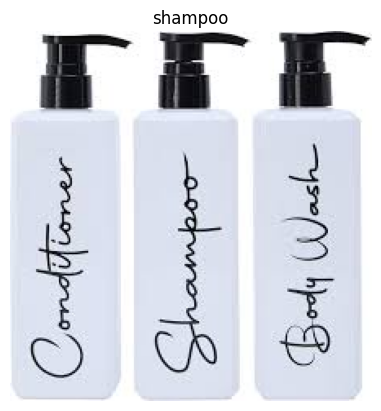

Showing image from: /content/drive/My Drive/BottleDataset/water/images.jpg


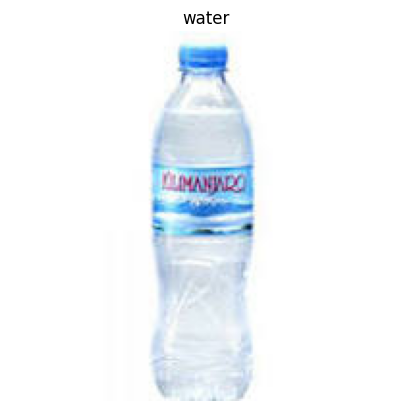

Showing image from: /content/drive/My Drive/BottleDataset/wine/download (2).jpg


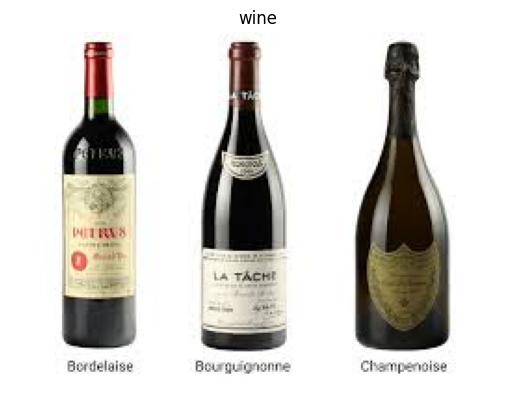

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

for category in categories:
    folder_path = os.path.join(dataset_path, category.strip())

    if os.path.isdir(folder_path):
        image_files = [
            f for f in os.listdir(folder_path)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ]

        if image_files:
            image_path = os.path.join(folder_path, image_files[0])
            print(f"Showing image from: {image_path}")
            img = Image.open(image_path)
            plt.imshow(img)
            plt.title(category)
            plt.axis("off")
            plt.show()
        else:
            print(f"No valid images found in {category}")
    else:
        print(f"{folder_path} is not a valid folder")


In [5]:
!pip install tensorflow opencv-python matplotlib numpy

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

# Image dimensions
IMG_SIZE = 224

def load_data(data_dir):
    data = []
    labels = []
    classes = os.listdir(data_dir)

    for class_name in classes:
        class_path = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            data.append(img)
            labels.append(classes.index(class_name))

    return np.array(data), np.array(labels), classes

# Load your data (replace with your path)
data_dir = "/content/drive/MyDrive/BottleDataset"  # Change this
X, y, class_names = load_data(data_dir)

# Normalize pixel values
X = X / 255.0

# Split into training and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Use a pre-trained model (transfer learning)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.3384 - loss: 1.5808 - val_accuracy: 0.7000 - val_loss: 0.9712
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 849ms/step - accuracy: 0.7649 - loss: 0.6670 - val_accuracy: 0.8000 - val_loss: 0.9015
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 812ms/step - accuracy: 0.9716 - loss: 0.2825 - val_accuracy: 0.7000 - val_loss: 0.9473
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 532ms/step - accuracy: 0.9147 - loss: 0.2116 - val_accuracy: 0.7000 - val_loss: 0.8925
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 505ms/step - accuracy: 1.0000 - loss: 0.1023 - val_accuracy: 0.7000 - val_loss: 0.8066
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 522ms/step - accuracy: 1.0000 - loss: 0.0660 - val_accuracy: 0.7000 - val_loss: 0.7268
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 927ms/step - accuracy: 1.0000 - loss: 0.0520 - val_accuracy: 0.7000 - val_loss: 0.6507
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 833ms/step - accuracy: 1.0000 - loss: 0.0300 - val_accuracy: 0.9000 - val_loss: 0

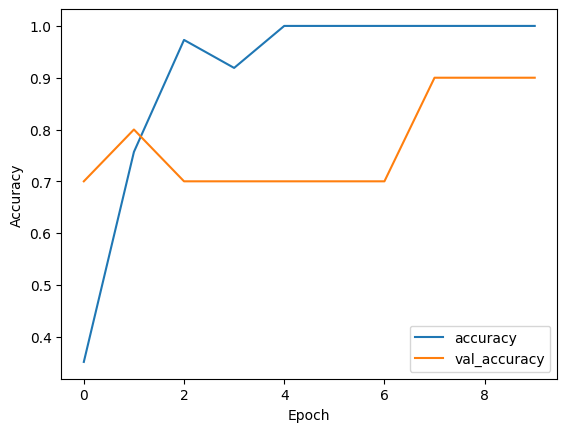

In [8]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_val, y_val),
    batch_size=32
)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
model.save('bottle_detector.h5')

# Download to your computer
from google.colab import files
files.download('bottle_detector.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
!pip install tensorflowjs

!mkdir tfjs_model
!tensorflowjs_converter --input_format keras bottle_detector.h5 tfjs_model

mkdir: cannot create directory ‘tfjs_model’: File exists
2025-07-13 08:01:46.092057: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752393706.117738    2646 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752393706.125145    2646 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-13 08:01:46.149857: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decisi

In [ ]:
!pip install tensorflowjs


In [2]:
!mkdir -p tfjs_model


In [3]:
!tensorflowjs_converter --input_format keras bottle_detector.h5 tfjs_model


2025-07-13 08:02:25.466046: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752393745.512177    2844 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752393745.520327    2844 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-13 08:02:25.544433: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed

In [4]:
!tensorflowjs_converter --input_format keras bottle_detector.h5 tfjs_model


2025-07-13 08:02:42.968416: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752393763.010752    2922 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752393763.022810    2922 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-13 08:02:43.061921: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed

In [5]:
from tensorflow import keras
model = keras.models.load_model('bottle_detector.h5')
model.summary()  # This should show your model architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,341 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Recompile the model with the same parameters
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Verify compilation
print("Model compilation check:", model.optimizer, model.loss, model.metrics)

Model compilation check: <keras.src.optimizers.adam.Adam object at 0x7f2758d8bed0> sparse_categorical_crossentropy [<Mean name=loss>, <CompileMetrics name=compile_metrics>]


In [ ]:
# Save in Keras format
model.save('bottle_detector.h5', save_format='h5')

# Alternative: Save as SavedModel format
model.save('bottle_detector_savedmodel', save_format='tf')

ValueError: The `save_format` argument is deprecated in Keras 3. Please remove this argument and pass a file path with either `.keras` or `.h5` extension.Received: save_format=tf

In [ ]:
# Save in native Keras format (.keras)
model.save('bottle_detector.keras')

# OR save in HDF5 format (.h5) if you prefer
model.save('bottle_detector.h5')  # Remove save_format argument

In [ ]:
!tensorflowjs_converter \
    --input_format=keras \
    bottle_detector.keras \
    tfjs_model

2025-07-11 08:46:27.977076: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752223588.017822   10184 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752223588.030447   10184 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
             ^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/tensorflowjs/converters/converter.py", line 959, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/usr/local/lib

In [ ]:
# Save as SavedModel (no extension)
model.save('bottle_detector_savedmodel')

# Convert with optimization
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_format=tfjs_graph_model \
    --quantize_float16 \
    --weight_shard_size_bytes=4194304 \  # 4MB chunks
    bottle_detector_savedmodel \
    tfjs_model

IndentationError: unexpected indent (ipython-input-10-173295691.py, line 6)

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow info messages

In [ ]:
# 1. First save your model in the newest Keras format
model.save('bottle_detector.keras')

# 2. Install the exact versions that work together
!pip install tensorflowjs==4.14.0 h5py==3.10.0 --quiet

# 3. Convert using this specific approach
!tensorflowjs_converter \
    --input_format=keras \
    --output_format=tfjs_graph_model \
    --quantize_float16 \
    bottle_detector.keras \
    tfjs_model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 58.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.34.0 requires p

In [ ]:
!pip uninstall -y tensorflow tensorflowjs jax jaxlib tf-keras keras numpy
!pip install --upgrade pip

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1
Found existing installation: tensorflowjs 4.14.0
Uninstalling tensorflowjs-4.14.0:
  Successfully uninstalled tensorflowjs-4.14.0
Found existing installation: jax 0.5.2
Uninstalling jax-0.5.2:
  Successfully uninstalled jax-0.5.2
Found existing installation: jaxlib 0.5.1
Uninstalling jaxlib-0.5.1:
  Successfully uninstalled jaxlib-0.5.1
Found existing installation: tf_keras 2.17.0
Uninstalling tf_keras-2.17.0:
  Successfully uninstalled tf_keras-2.17.0
Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninsta

In [ ]:
!pip install tensorflow==2.17.0
!pip install tensorflowjs==4.14.0
!pip install keras==2.17.0
!pip install numpy==1.26.4
!pip install h5py==3.10.0
!pip install protobuf==3.20.3

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 49.2 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [tensorflow]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.1 requires tf_keras~=2.17, which is not installed.
chex 0.1.89 requires jax>=0.4.27, which is not installed.
chex 0.1.89 requires jaxlib>=0.4.27, which is not installed.
orbax-checkpoint 0.11.16 requires jax>=0.5.0, which is not installed.
dopamine-rl 4.1.2 requires jax>=0.1.72, which is not installed.
dopamine-rl 4.1.2 requires jaxlib>=0.1.51, which is not installed.
dop

  Using cached tensorflowjs-4.14.0-py3-none-any.whl.metadata (3.2 kB)
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-2.17.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached tf_keras-2.19.0-py3-none-any.whl.metadata (1.8 kB)
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
  Using cached tf_keras-2.17.0-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorflowjs-4.14.0-py3-none-any.whl (89 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 MB 60.5 MB/s eta 0:00:00
Using cached tensorflow-2.17.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
Using cached tf_keras-2.17.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: tensorf

ERROR: Could not find a version that satisfies the requirement keras==2.17.0 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc0, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0rc3, 2.6.0, 2.7.0rc0, 2.7.0rc2, 2.7.0, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.10.0rc0, 2.10.0rc1, 2.10.0, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0rc3, 2.11.0, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.1rc0, 2.13.1rc1, 2.13.1, 2.14.0rc0, 2.14.0, 2.15.0rc0, 2.15.0rc1, 2.15.0, 3.0.0, 3.0.1, 3.0.2, 3.0.3, 3.0.4, 3.0.5, 3.1.0, 3.1.1, 3.2.0, 3.2.1, 3.3.0, 3.3.1, 3.3.2, 3.3.3, 3.4.0, 3.4.1, 3.5.0, 3.6.0, 3.7.0, 3.8.0, 3.9.0, 3.9.1, 3.9.2, 3.10.0)
ERROR: No matching distribution found for keras==2.17.0


In [6]:
from tensorflow.keras.models import load_model

try:
    model = load_model('bottle_detector.h5')
    print("Model loaded successfully!")
except:
    print("This is likely a weights-only file.")


Model loaded successfully!


In [8]:
!tensorflowjs_converter --input_format keras bottle_detector.h5 tfjs_model


2025-07-13 08:06:38.425195: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752393998.451304    3890 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752393998.458605    3890 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [9]:
rm -rf tfjs_model


In [11]:
!tensorflowjs_converter --input_format keras bottle_detector.h5 tfjs_model


2025-07-13 08:08:48.993147: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752394129.019730    4431 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752394129.027346    4431 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [12]:
!ls


bottle_detector.h5  drive  sample_data	tfjs_model


In [13]:
from tensorflow.keras.models import load_model

# Load your current model
model = load_model("bottle_detector.h5")

# Save it again explicitly as a new full model file
model.save("bottle_detector_full.h5")


In [14]:
!tensorflowjs_converter --input_format keras bottle_detector_full.h5 tfjs_model


2025-07-13 08:11:10.377801: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752394270.437615    5004 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752394270.457072    5004 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [16]:
import h5py

with h5py.File('bottle_detector_full.h5', 'r') as f:
    print("Keys in file:", list(f.keys()))


Keys in file: ['model_weights', 'optimizer_weights']


In [17]:
# Example for a basic CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # change based on your classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Optionally train or load weights
# model.fit(...) or model.load_weights(...)

# Now save full model with architecture + weights
model.save("bottle_detector_full.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
!tensorflowjs_converter --input_format keras bottle_detector_full.h5 tfjs_model


2025-07-13 08:14:01.086229: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752394441.130315    5702 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752394441.142023    5702 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [19]:
model.save("bottle_detector_full.keras")


In [21]:
import tensorflow as tf

model = tf.keras.models.load_model("bottle_detector_full.keras")

# Save in SavedModel format (default when passing a folder)
model.save("saved_model_dir")


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=saved_model_dir.